In [2]:
#Lectura de paquetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import requests
import numpy as np


In [172]:
#Lectura de datos
AccesNacionInt= pd.read_csv("http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/TOTAL-NACIO-DE-ACCES-48866/data.csv/?auth_key=DBO6spTWTTxwoF0kLbIBf0vGIc181o1mEnrHyhEt&limit=50", decimal=',')
AccesProvInt= pd.read_csv("http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/BANDA-ANCHA-Y-BANDA-ANGOS/data.csv/?auth_key=DBO6spTWTTxwoF0kLbIBf0vGIc181o1mEnrHyhEt&limit=850")
AccesProvVelInt= pd.read_csv("http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-23248/data.csv/?auth_key=DBO6spTWTTxwoF0kLbIBf0vGIc181o1mEnrHyhEt&limit=850", decimal= ',')
AccesLocInt= pd.read_csv("http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/LISTA-DE-LOCAL-CON-CONEC/data.csv/?auth_key=DBO6spTWTTxwoF0kLbIBf0vGIc181o1mEnrHyhEt&limit=4400")

In [ ]:
#Convertir a datos numéricos
AccesNacionInt['Banda ancha fija']= AccesNacionInt['Banda ancha fija'].str.replace('.', '').astype(int)
AccesNacionInt['Dial up']= AccesNacionInt['Dial up'].str.replace('.', '').astype(int)
AccesNacionInt['Total']= AccesNacionInt['Total'].str.replace('.', '').astype(int)

#Acceso a Internet en Argentina

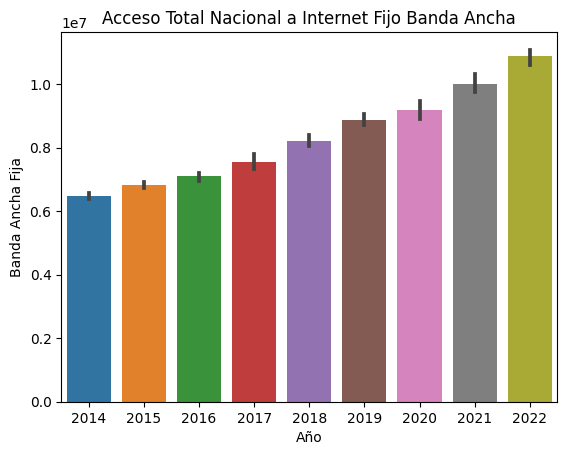

In [140]:
#Gráfico de barras Banda ancha fija
sns.barplot(x=AccesNacionInt['Año'], y=AccesNacionInt['Banda ancha fija'])

plt.xlabel('Año')
plt.ylabel('Banda Ancha Fija')
plt.title('Acceso Total Nacional a Internet Fijo Banda Ancha')
plt.show()


Es posible determinar según el gráfico anterior que el acceso a internet fijo banda ancha en los últimos años desde el año 2014 ha venido aumentando, lo que sugiere alta demanda del servicio  

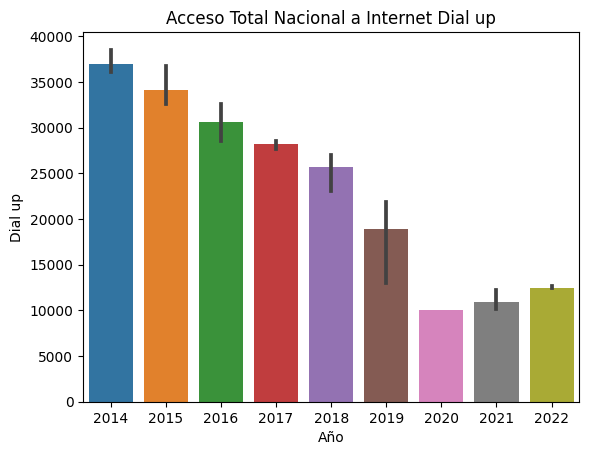

In [141]:
#Gráfico de barras Dial up

sns.barplot(x=AccesNacionInt['Año'], y=AccesNacionInt['Dial up'])

plt.xlabel('Año')
plt.ylabel('Dial up')
plt.title('Acceso Total Nacional a Internet Dial up')
plt.show()

Como se puede observar en la gráfica anterior, el acceso al servicio de internet Dial up, ha venido disminuyendo, esto puede deberse al tipo de conexión antigua y obsoleta pues actualmente hay otras que funcionan de manera más eficiente, por lo tanto, es posible que la demanda de este servicio sea baja.

Según los dos análisis anteriores, es posible concluir que el acceso a internet a banda ancha ha venido en aumento en comparación con Dial up, resulta interesante comparar ambos servicios con una medida que permita determinar su dependencia.

In [184]:
#Usando los datos de PIB per cápita para Argentina
#Conectar con la API de el banco mundial
response= requests.get('https://api.worldbank.org/v2/countries/AR/indicators/NY.GDP.PCAP.CD?format=json')

In [185]:
#Procesar los datos de la api (formato json)
dataPib= pd.DataFrame(response.json()[1])
dataPib= dataPib[['date', 'value']]
#Filtrar para la serie de analisis
dataPib= dataPib[dataPib['date'] >= '2014']
dataPib['date']= dataPib['date'].astype('int64')
dataPib= dataPib.rename(columns= {'date': 'Año', 'value': 'PIBPerca'})

In [186]:
#Cruce de datos de PIB con el acceso a internet
AccesNacionInt = pd.merge(AccesNacionInt, dataPib, on="Año")


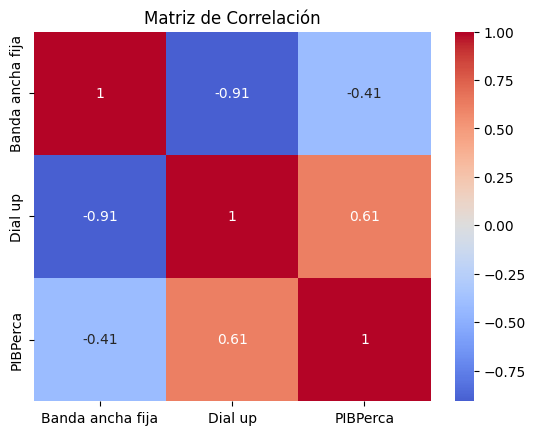

In [152]:
#Matrix de correlación
AccesNacionIntCorr= AccesNacionInt[['Banda ancha fija', 'Dial up', 'PIBPerca']]

correlation_matrix = AccesNacionIntCorr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

En el gráfico anterior, se representa la matriz de correlación entre los servicios de Internet en Argentina y una medida del ingreso promedio por persona en el país, conocida como PIB per cápita. Se observa que existe una relación inversa entre los servicios de Internet por banda ancha fija y Dial-up, lo que sugiere que un aumento en el uso de banda ancha conlleva una disminución en el uso de Dial-up. Esto es comprensible, ya que es probable que los usuarios de Dial-up migren hacia la banda ancha debido a sus ventajas.

Inicialmente, se esperaba que el PIB per cápita tuviera una influencia positiva en ambos servicios. Sin embargo, para el caso de la banda ancha, esto no se cumple, lo cual resulta inesperado, ya que se anticiparía que a medida que los ingresos aumentan, la calidad de los servicios también mejore, incluyendo el acceso a Internet de banda ancha.

In [153]:
# Se escalan las variables para juntarlas todas en un gráfico y poder compararlas
scaler = StandardScaler()
# La estandarización se realiza con la media y desviación estandar asi:
# x-Media/sd
data_estandarizado = scaler.fit_transform(AccesNacionIntCorr)
data_estandarizado = pd.DataFrame(data_estandarizado, columns=AccesNacionIntCorr.columns)
data_estandarizado['Año']= AccesNacionInt['Año']

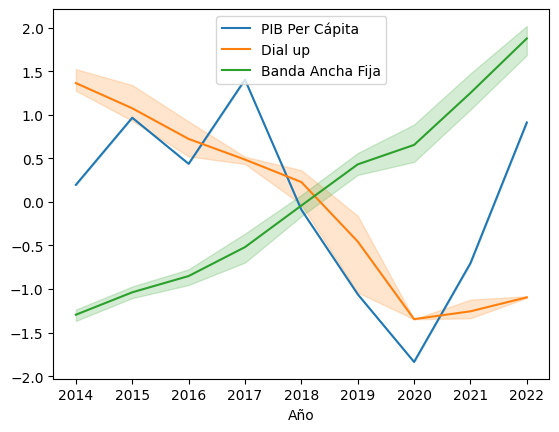

In [154]:
sns.lineplot(x='Año', y='PIBPerca', data=data_estandarizado, label='PIB Per Cápita')
sns.lineplot(x='Año', y='Dial up', data=data_estandarizado, label='Dial up')
sns.lineplot(x='Año', y='Banda ancha fija', data=data_estandarizado, label='Banda Ancha Fija')
plt.xlabel('Año')
plt.ylabel('')
plt.legend(loc= 'upper center')

plt.show()


Se crearon gráficos de líneas para cada una de las series analizadas. Se pudo observar una tendencia lineal inversa entre los servicios de internet, lo cual indica que hay una relación inversa entre el uso de banda ancha y el uso de Dial-up. Sin embargo, en el caso del PIB per cápita, no se identificó una tendencia clara. A pesar de ello, se pudo concluir que independientemente de las fluctuaciones en esta medida, el acceso y posiblemente la demanda de servicios de internet continúan aumentando.Esto sugiere que el internet se ha convertido en un servicio básico y necesario para las personas, y que, sin importar sus ingresos, optan por adquirir servicios de internet, principalmente de banda ancha.

#Acceso a Internet en Argentina por provincias


In [ ]:
#Tranformado a datos numéricos
AccesProvInt['Dial up']= np.where(AccesProvInt['Dial up'] == '- 0', '0', AccesProvInt['Dial up'])
AccesProvInt.fillna('0')

AccesProvInt['Banda ancha fija']= AccesProvInt['Banda ancha fija'].str.replace('.', '').astype(int)
AccesProvInt['Dial up']= AccesProvInt['Dial up'].str.replace('.', '').astype(float)

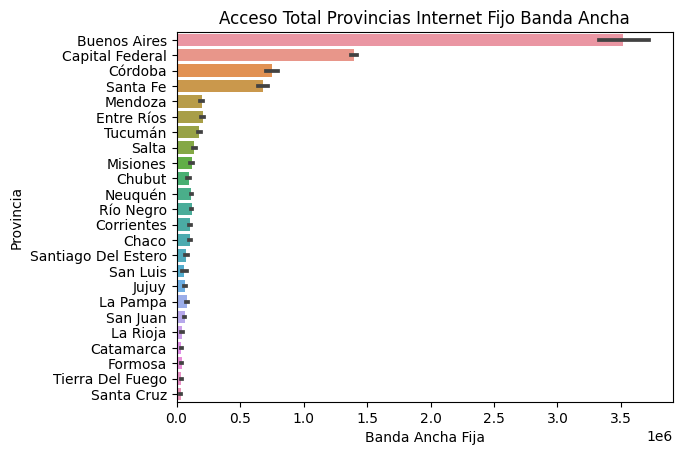

In [156]:
#Gráfico de barras por provincia
AccesProvInt = AccesProvInt.sort_values(by='Banda ancha fija', ascending=False)

sns.barplot(x=AccesProvInt['Banda ancha fija'], y= AccesProvInt['Provincia'])

plt.ylabel('Provincia')
plt.xlabel('Banda Ancha Fija')
plt.title('Acceso Total Provincias Internet Fijo Banda Ancha')
plt.show()

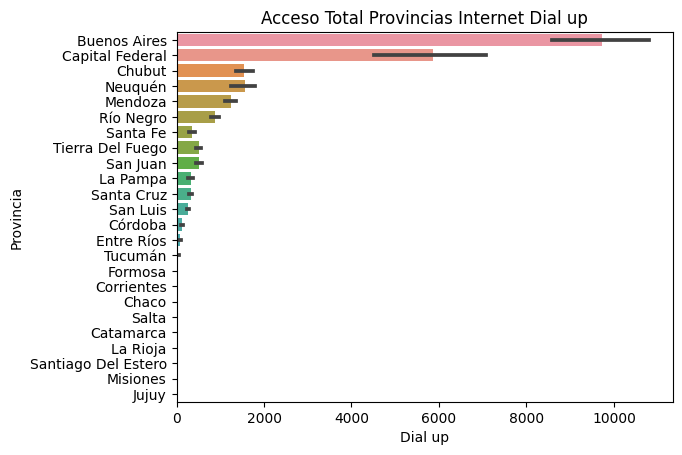

In [7]:
AccesProvInt = AccesProvInt.sort_values(by='Dial up', ascending=False)

sns.barplot(x=AccesProvInt['Dial up'], y= AccesProvInt['Provincia'])

plt.ylabel('Provincia')
plt.xlabel('Dial up')
plt.title('Acceso Total Provincias Internet Dial up')
plt.show()

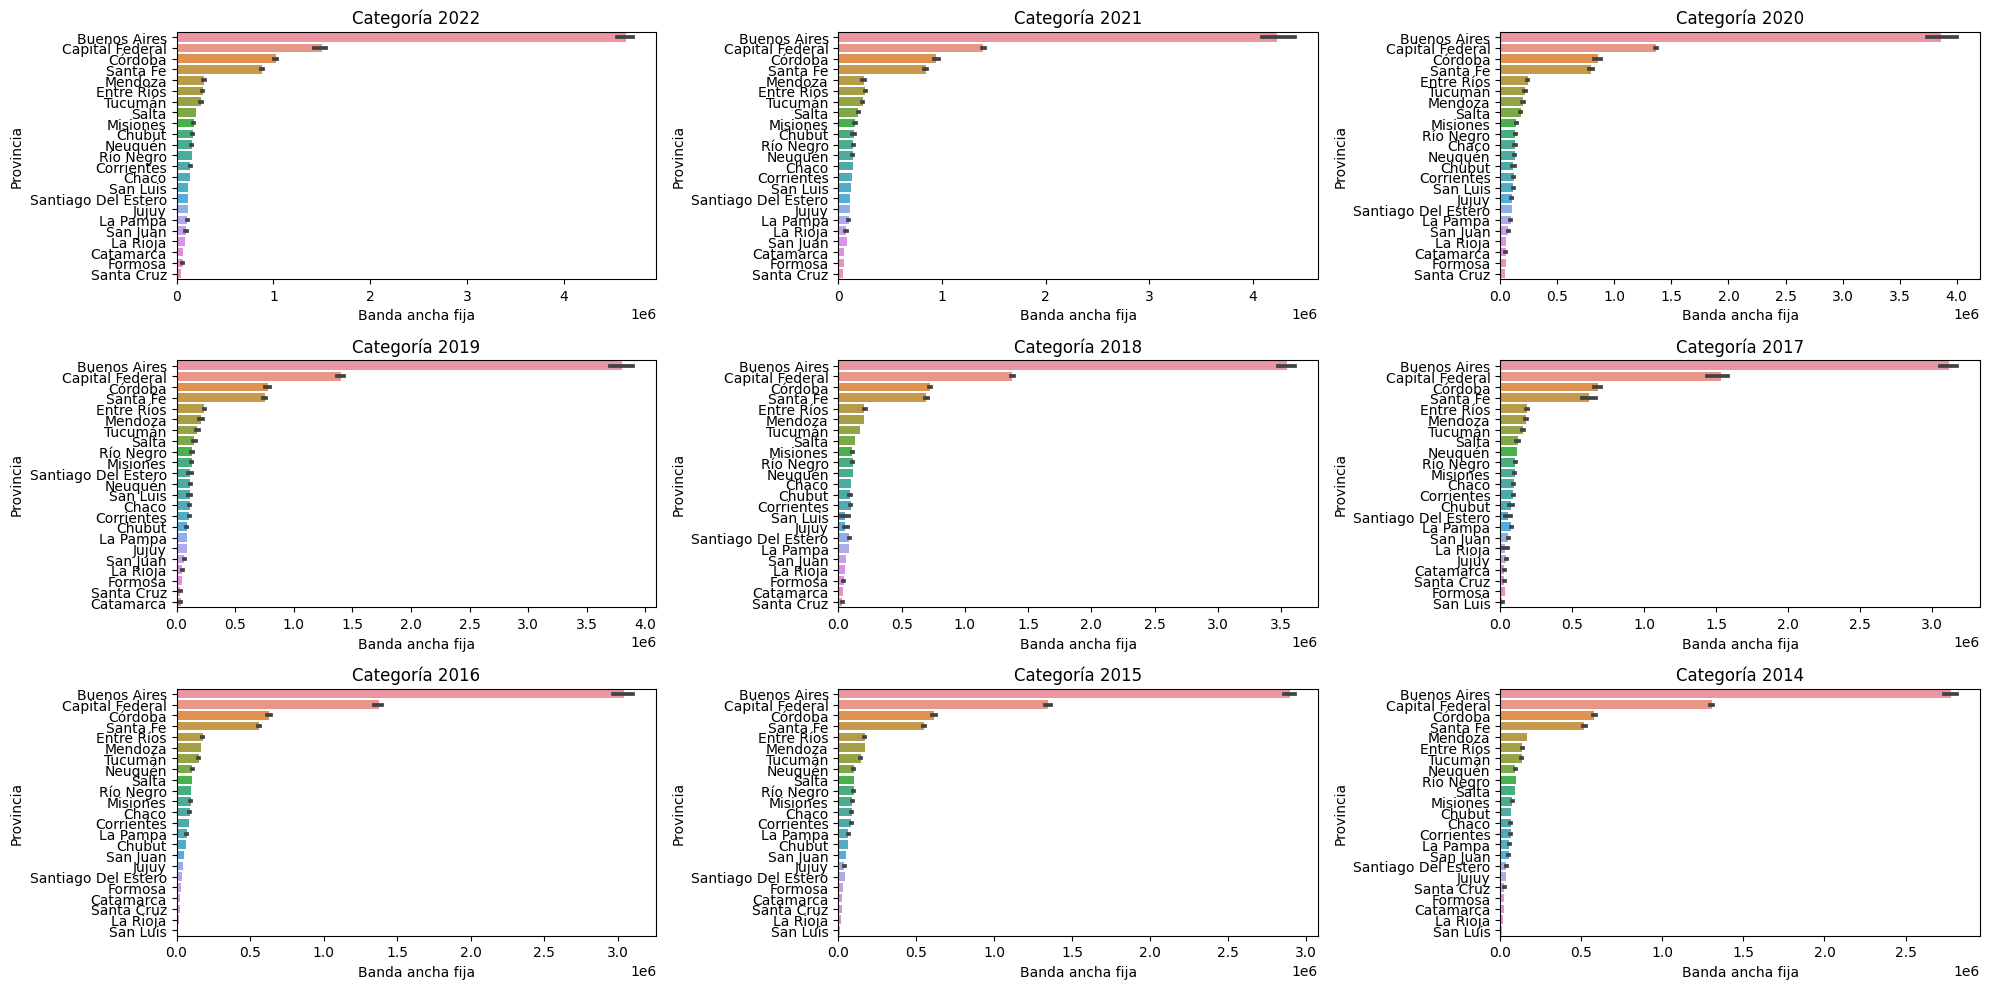

In [66]:
# Crear una matrz de gráficos
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

# Iterar sobre las categorías únicas
categorias = AccesProvInt['Año'].unique()
for i, categoria in enumerate(categorias):
    # Filtrar los datos por categoría
    categoria_data = AccesProvInt[AccesProvInt['Año'] == categoria]
    categoria_data = categoria_data.sort_values(by='Banda ancha fija', ascending=False)

    # Crear un gráfico de barras para cada año en la subtrama correspondiente
    row = i // 3  # Fila en la matriz de subtramas
    col = i % 3   # Columna en la matriz de subtramas
    ax = axes[row, col]
    sns.barplot(x='Banda ancha fija', y='Provincia', data=categoria_data, ax=ax)
    ax.set_title(f'{categoria}')

# Ajustar los espacios entre subtramas
plt.tight_layout()

# Mostrar la matriz de gráficos de barras
plt.show()


En los tres últimos gráficos mostrados, se presenta el acceso a Internet por banda ancha y Dial-up en cada provincia. A partir de estos gráficos, se puede concluir que las provincias con mayor acceso a estos servicios son Buenos Aires, Capital Federal, Córdoba y Santa Fe. Por otro lado, las provincias con menor acceso son Formosa, Catamarca, La Rioja y San Luis.

In [158]:
#Datos de la población en el ultimo censo
dataPop= pd.read_csv('PopAR2010.csv')

#Calculo de índice de ruralidad como la razón entre la pobación rural y la total para cada provincia
dataPop['IR']= dataPop['Rural total']/dataPop['Total']

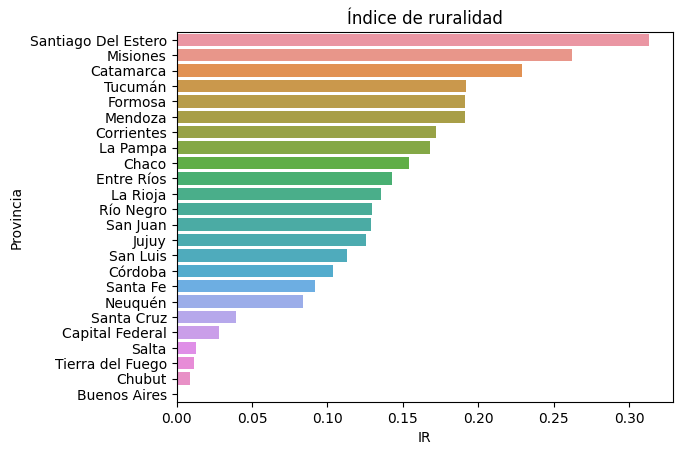

In [159]:
dataPop = dataPop.sort_values(by='IR', ascending=False)

sns.barplot(x=dataPop['IR'], y= dataPop['Jurisdicción'])

plt.ylabel('Provincia')
plt.xlabel('IR')
plt.title('Índice de ruralidad')
plt.show()

El índice de ruralidad se utiliza para medir la proporción de población rural con respecto al total, donde valores cercanos a 1 indican lugares predominantemente rurales, mientras que valores cercanos a 0 representan áreas mayormente urbanas. En la gráfica previa, se puede observar que, en general, las provincias no son consideradas rurales.

Es interesante notar que las provincias con menor acceso a Internet presentan una considerable combinación de población tanto rural como urbana. Se esperaría que las zonas más pobladas, ya sean urbanas o densamente pobladas, tuvieran un mayor acceso a los servicios de Internet. Sin embargo, esto no parece ser comúnmente el caso, lo que sugiere una posible demanda insatisfecha de servicios debido a una oferta limitada.

Como se mencionó anteriormente, en general, las provincias son mayormente urbanas, lo que hace aún más destacable el hecho de que el acceso a Internet sea escaso en algunas áreas. Esto podría indicar que existe una necesidad latente de servicios de Internet en esas regiones, lo que podría ser una oportunidad para ampliar y mejorar la infraestructura y el acceso a la red en dichas áreas.

#Ancho de banda

In [173]:
#Convertir a datos numéricos varias columnas
cols= list(AccesProvVelInt.columns[3:])

AccesProvVelInt[cols]= AccesProvVelInt[cols].replace('\.', '', regex=True).astype(float)


In [109]:

# Se escalan las variables para juntarlas todas en un gráfico y poder compararlas
scaler = StandardScaler()
# La estandarización se realiza con la media y desviación estandar asi:
# x-Media/sd
data_estandarizado = scaler.fit_transform(AccesProvVelInt[cols[:8]])

data_estandarizado = pd.DataFrame(data_estandarizado, columns=AccesProvVelInt[cols[:8]].columns)

data_estandarizado['Año']= AccesProvVelInt['Año']

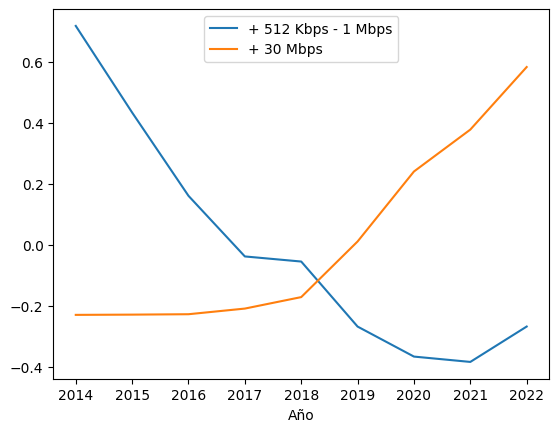

In [123]:
#plt.figure(figsize=(10, 8))

for i in [1,6]:
  sns.lineplot(x='Año', y= cols[i], data=data_estandarizado, label= cols[i], errorbar=None)
plt.xlabel('Año')
plt.ylabel('')
plt.legend(loc= 'upper center')

plt.show()

En el gráfico anterior, se muestran los anchos de banda máximos (30 Mbps) y mínimos (512 Kbps) que son ofrecidos comúnmente. En los últimos años, se ha observado un crecimiento en la demanda de anchos de banda superiores a 30 Mbps, lo cual sugiere que los usuarios prefieren un servicio más rápido y eficiente, aun cuando implique un costo ligeramente más elevado (ya que los anchos de banda mayores tienden a ser más costosos). Esta tendencia indica que los usuarios valoran la calidad del servicio y están dispuestos a invertir un poco más para obtener una conexión más rápida y confiable en lugar de optar por una opción más económica pero más lenta.

#Tipo de tecnología

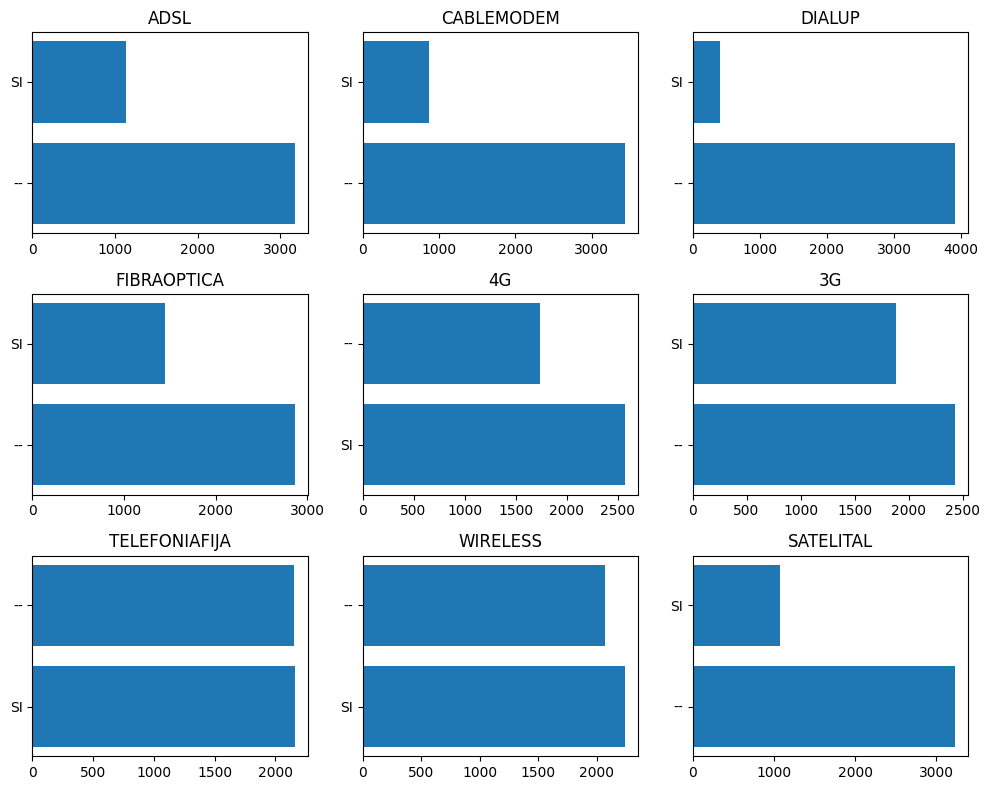

In [167]:
# Crear una figura con subtramas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

# Iterar sobre las categorías únicas
categorias = list(AccesLocInt.columns[3:])
for i, categoria in enumerate(categorias):

    # Crear un gráfico de barras para cada tecnología en la subtrama correspondiente
    bars = AccesLocInt[categoria].value_counts()
    row = i // 3  # Fila en la matriz de subtramas
    col = i % 3
    ax= axes[row,col]
    ax.barh(bars.index, bars.values)
    ax.set_title(f'{categoria}')

# Ajustar los espacios entre subtramas
plt.tight_layout()

# Mostrar la matriz de gráficos de barras
plt.show()

La gráfica anterior ilustra las distintas tecnologías utilizadas para proveer servicio de internet. Las más comunes son la telefonía fija y la conexión inalámbrica, seguidas por las tecnologías móviles como 4G y 3G. En cambio, las tecnologías menos empleadas son las Dial Up, lo cual es comprensible dado que su uso ha disminuido desde el año 2014.

KPIs: %Ancho de banda, %Retención de clentes en un servico, Tipo de conectividad.